In [1]:
from allen_cahn_train import train_allen_cahn

config_spinn = {
    "fourier_features": True,
    "n_fourier_features": 128,
    "sigma": 10,
    "net_type": "SPINN",
    "mlp_type": "mlp",
    "activations": "sin",
    "n_domain": 150**2,
    "n_iters": 30000,
    "rank": 64,
    "seed": 0,
}

config_spinn_modified_mlp = {
    "fourier_features": True,
    "n_fourier_features": 128,
    "sigma": 10,
    "net_type": "SPINN",
    "mlp_type": "modified-mlp",
    "activations": "sin",
    "n_domain": 200**2,
    "n_iters": 20000,
    "rank": 32,
    "seed": 0,
}

config_pinn = {
    "fourier_features": True,
    "n_fourier_features": 256,
    "sigma": 10,
    "net_type": "PINN",
    "activations": "sin",
    "n_domain": 150**2,
    "n_iters": 30000,
    "seed": 0,
}

# Train SPINN and PINN with and without Fourier features
data_spinn_fourier = train_allen_cahn(config_spinn)
data_spinn_no_fourier = train_allen_cahn({**config_spinn, "fourier_features": False})
# data_spinn_modified_fourier = train_allen_cahn(config_spinn_modified_mlp)
# data_spinn_modified_no_fourier = train_allen_cahn({**config_spinn_modified_mlp, "fourier_features": False})
# data_pinn_fourier = train_allen_cahn(config_pinn)
# data_pinn_no_fourier = train_allen_cahn({**config_pinn, "fourier_features": False})

Using backend: jax
Other supported backends: tensorflow.compat.v1, tensorflow, pytorch, paddle.
paddle supports more examples now and is recommended.
Enable just-in-time compilation with XLA.



Set the default automatic differentiation to forward mode.
Compiling model...
'compile' took 3.312716 s

Training model...

Step      Train loss    Test loss     Test metric
0         [2.41e+01]    [2.41e+01]    []  
1000      [1.06e-02]    [1.06e-02]    []  
2000      [4.71e-03]    [4.71e-03]    []  
3000      [1.32e-03]    [1.32e-03]    []  
4000      [5.68e-04]    [5.68e-04]    []  
5000      [7.39e-04]    [7.39e-04]    []  
6000      [3.66e-04]    [3.66e-04]    []  
7000      [3.71e-03]    [3.71e-03]    []  
8000      [1.83e-04]    [1.83e-04]    []  
9000      [4.26e-04]    [4.26e-04]    []  
10000     [5.89e-04]    [5.89e-04]    []  
11000     [5.01e-04]    [5.01e-04]    []  
12000     [5.64e-05]    [5.64e-05]    []  
13000     [5.07e-05]    [5.07e-05]    []  
14000     [1.97e-04]    [1.97e-04]    []  
15000     [6.91e-03]    [6.91e-03]    []  
16000     [8.98e-04]    [8.98e-04]    []  
17000     [2.07e-04]    [2.07e-04]    []  
18000     [5.21e-04]    [5.21e-04]    []  
19000    

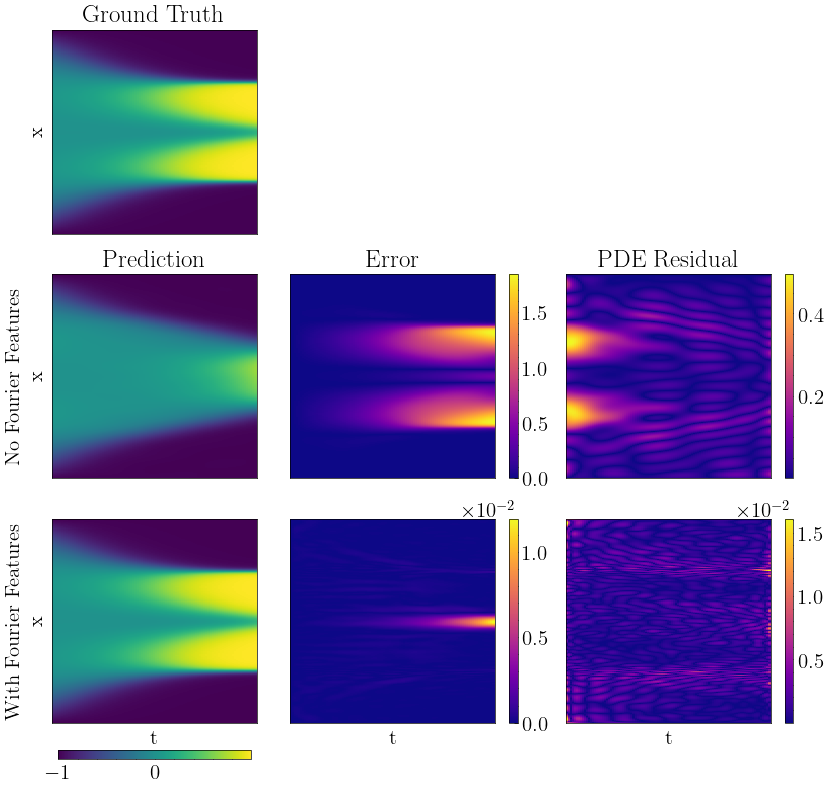

Fig width: 9.4, set it to 3.13 < 6.34 (A4 with margins) in latex to have a printed font size of 6.00 for titles and 5.00 for the axis


In [ ]:
import matplotlib.pyplot as plt
import scienceplots  # optional, requires latex
plt.style.use(['science', 'grid'])
import numpy as np
from scipy.io import loadmat
import os
import matplotlib.transforms as mtransforms
from matplotlib import ticker

# --- Font size for printing ---
plotting_factor = 3
font_factor = 3
title_font_size = 6
axes_font_size = 5
plt.rcParams.update({
    "font.size": title_font_size*font_factor,
    "figure.titlesize": title_font_size*font_factor,
    "axes.titlesize": title_font_size*font_factor,
    "axes.labelsize": axes_font_size*font_factor,
    "xtick.labelsize": axes_font_size*font_factor,
    "ytick.labelsize": axes_font_size*font_factor,
    "legend.fontsize": axes_font_size*font_factor,
})

def gen_testdata():
    data = loadmat("../dataset/Allen_Cahn.mat")
    t = data["t"]
    x = data["x"]
    u = data["u"]

    xx, tt = np.meshgrid(x, t, indexing="ij")
    y = u.flatten()[:, None]

    return y, xx, tt, u

def make_formatter():
    """
    Create and return a scalar formatter for colorbar tick labels.
    """
    formatter = ticker.ScalarFormatter(useMathText=True)
    formatter.set_scientific(True)
    formatter.set_powerlimits((-2, 2))
    return formatter

y, xx, tt, u_true = gen_testdata()
u_pred = data_spinn_no_fourier["u_pred"]
u_pred_fourier = data_spinn_fourier["u_pred"]
u_pred_all = [u_pred, u_pred_fourier]

u = data_spinn_no_fourier["u_true"]
pde_loss = data_spinn_no_fourier["pde_loss"]
pde_loss_fourier = data_spinn_fourier["pde_loss"]
pde_loss_all = [pde_loss, pde_loss_fourier]

fig, ax = plt.subplots(3,3, figsize=(9.4,9))

vmin = np.nanmin([u, u_pred, u_pred_fourier])
vmax = np.nanmax([u, u_pred, u_pred_fourier])

im_ref = ax[0][0].pcolor(tt, xx, u, vmin=vmin, vmax=vmax)
ax[0][0].set_title("Ground Truth")
# ax[0][0].set_xlabel("t")
ax[0][0].set_ylabel("x")
# ax[0][0].axis("equal")
ax[0][0].set_xticks([])
ax[0][0].set_yticks([])
ax[0][0].set_aspect(1/2)

ax[0][1].axis("off")
ax[0][2].axis("off")

pos = ax[2][0].get_position()
cax_pos = mtransforms.Bbox.from_bounds(pos.x0 + 0.05*pos.width, pos.y0 - 0.04,
                                        pos.width*0.9, 0.01)
cax = fig.add_axes(cax_pos)
cbfield = fig.colorbar(im_ref, cax=cax, orientation='horizontal', format=make_formatter())
cbfield.ax.xaxis.set_ticks_position('bottom')

fourrier_str = ["No Fourier Features", "With Fourier Features"]
for i in range(2):
    im = ax[i+1][0].pcolor(tt, xx, u_pred_all[i], vmin=vmin, vmax=vmax)
    # fig.colorbar(im, ax=ax[i][1])
    ax[1][0].set_title("Prediction")
    ax[2][0].set_xlabel("t")
    ax[i+1][0].set_ylabel("x")
    ax[i+1][0].set_xticks([])
    ax[i+1][0].set_yticks([])
    ax[i+1][0].set_aspect(1/2)

    pos = ax[i+1][0].get_position()
    # cax_pos = mtransforms.Bbox.from_bounds(pos.x0 - 0.015, pos.y0,
    #                                          0.01,pos.height)
    fig.text(
        pos.x0 - 0.04,
        pos.y0 + pos.height / 2,
        fourrier_str[i],
        va='center',
        ha='center',
        rotation='vertical',
        fontsize=axes_font_size * font_factor
    )

    im = ax[i+1][1].pcolor(tt,xx,np.absolute(u_pred_all[i] - u), cmap="plasma")
    # fig.colorbar(im, ax=ax[i+1][1])
    ax[1][1].set_title("Error")
    ax[2][1].set_xlabel("t")
    # ax[i+1][1].set_ylabel("x")
    ax[i+1][1].set_xticks([])
    ax[i+1][1].set_yticks([])
    ax[i+1][1].set_aspect(1/2)

    shift = -0.02  # negative shifts the 2nd column leftwards
    pos = ax[i+1][1].get_position()
    ax[i+1][1].set_position([
        pos.x0 + shift,  # shift left
        pos.y0,
        pos.width,
        pos.height
    ])
    pos = ax[i+1][1].get_position()
    cax_pos = mtransforms.Bbox.from_bounds(pos.x1 + 0.015, pos.y0,
                                             0.009,pos.height)
    cax = fig.add_axes(cax_pos)
    cbfield = fig.colorbar(im, cax=cax, orientation='vertical', format=make_formatter())
    cbfield.ax.yaxis.set_ticks_position('right')

    # PDE loss only for Fourier SPINN
    im = ax[i+1][2].pcolor(tt,xx,np.absolute(pde_loss_all[i]), cmap="plasma")
    ax[1][2].set_title("PDE Residual")
    ax[2][2].set_xlabel("t")
    # ax[i+1][2].set_ylabel("x")
    ax[i+1][2].set_xticks([])
    ax[i+1][2].set_yticks([])
    ax[i+1][2].set_aspect(1/2)

    pos = ax[i+1][2].get_position()
    cax_pos = mtransforms.Bbox.from_bounds(pos.x1 + 0.015, pos.y0,
                                             0.009,pos.height)
    cax = fig.add_axes(cax_pos)
    cbfield = fig.colorbar(im, cax=cax, orientation='vertical', format=make_formatter())
    cbfield.ax.yaxis.set_ticks_position('right')

    
plt.show()
print(f"Fig width: {fig.get_figwidth()}, set it to {fig.get_figwidth()/font_factor:.2f} < 6.34 (A4 with margins) in latex to have a printed font size of {title_font_size:.2f} for titles and {axes_font_size:.2f} for the axis")

fig.savefig("figures/allen_cahn_spinn_fourier.png", bbox_inches='tight', dpi=300)

## Residual-Based Attention

In [2]:
from allen_cahn_train import train_allen_cahn

config_pinn_rba = {
    "fourier_features": True,
    "n_fourier_features": 256,
    "sigma": 10,
    "net_type": "PINN",
    "activations": "sin",
    "n_domain": 150**2,
    "n_iters": 30000,
    "seed": 0,
    "RBA": True,  # Residual-Based Attention
}

config_spinn_rba = {
    "fourier_features": True,
    "n_fourier_features": 128,
    "sigma": 10,
    "net_type": "SPINN",
    "mlp_type": "mlp",
    "activations": "sin",
    "n_domain": 150**2,
    "n_iters": 3000,
    "rank": 64,
    "seed": 0,
    "RBA": True,  # Residual-Based Attention
}

config_spinn_mod_rba = {
    "fourier_features": True,
    "n_fourier_features": 128,
    "sigma": 10,
    "net_type": "SPINN",
    "mlp_type": "modified-mlp",
    "activations": "sin",
    "n_domain": 200**2,
    "n_iters": 20000,
    "rank": 32,
    "seed": 0,
    "RBA": False,  # Residual-Based Attention
}

# data_pinn_rba = train_allen_cahn(config_pinn_rba)
data_spinn_rba = train_allen_cahn(config_spinn_rba)
# data_spinn_mod_rba = train_allen_cahn(config_spinn_mod_rba)

Set the default automatic differentiation to forward mode.
Compiling model...
'compile' took 0.102760 s

Training model...

Step      Train loss    Test loss     Test metric
0         [9.43e+00]    [9.43e+00]    []  
1000      [8.39e-06]    [8.39e-06]    []  
2000      [9.83e-06]    [9.83e-06]    []  
3000      [1.10e-05]    [1.10e-05]    []  

Best model at step 1000:
  train loss: 8.39e-06
  test loss: 8.39e-06
  test metric: []

'train' took 14.118809 s

Compiling model...
'compile' took 0.040908 s

Training model...

Step      Train loss    Test loss     Test metric
3000      [1.10e-05]    [1.10e-05]    []  
4000      [3.17e-06]    [3.17e-06]    []  
5000      [5.35e-06]    [5.35e-06]    []  
6000      [5.68e-06]    [5.68e-06]    []  

Best model at step 4000:
  train loss: 3.17e-06
  test loss: 3.17e-06
  test metric: []

'train' took 13.388396 s

Compiling model...
'compile' took 0.042650 s

Training model...

Step      Train loss    Test loss     Test metric
6000      [5.68e-06]

TypeError: 'NoneType' object is not callable

In [9]:
model = data_spinn_rba["model"]
anchors = model.data.train_x
anchors[0][1].shape


(150, 1)

In [2]:
data_spinn_mod_rba = train_allen_cahn(config_spinn_mod_rba)

Set the default automatic differentiation to forward mode.
Compiling model...
'compile' took 0.990771 s

Training model...

Step      Train loss    Test loss     Test metric
0         [7.16e+03]    [7.16e+03]    []  
1000      [6.92e-01]    [6.92e-01]    []  
2000      [3.58e-01]    [3.58e-01]    []  
3000      [1.94e-01]    [1.94e-01]    []  
4000      [9.96e-02]    [9.96e-02]    []  
5000      [6.00e-02]    [6.00e-02]    []  
6000      [3.44e-02]    [3.44e-02]    []  
7000      [2.17e-02]    [2.17e-02]    []  
8000      [1.53e-02]    [1.53e-02]    []  
9000      [1.13e-02]    [1.13e-02]    []  
10000     [8.97e-03]    [8.97e-03]    []  
11000     [2.07e-02]    [2.07e-02]    []  
12000     [3.71e-03]    [3.71e-03]    []  
13000     [2.47e-03]    [2.47e-03]    []  
14000     [2.32e-03]    [2.32e-03]    []  
15000     [1.55e-03]    [1.55e-03]    []  
16000     [2.84e-04]    [2.84e-04]    []  
17000     [1.89e-03]    [1.89e-03]    []  
18000     [9.91e-04]    [9.91e-04]    []  
19000    

In [2]:
model = data_spinn_mod_rba["model"]

NameError: name 'data_spinn_mod_rba' is not defined